<a href="https://colab.research.google.com/github/AdarshPandey-07/A.Y.-2022-23_S.E.-III-Mini-Project-1A/blob/main/Skincare_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![44.png](attachment:44.png)

# <center><font color='#008d8e'>Skin Care Recommendation System</font></center>

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
# CountVectorizer+tfidfTransformer = tfidfVectorizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show,curdoc,output_notebook,push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource,HoverTool,Select,Paragraph,TextInput
from ipywidgets import interact
!pip install markovify
import markovify
import string
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

import warnings; warnings.simplefilter('ignore')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 8.8 MB/s eta 0:00:00
  Created wheel for markovify: filename=markovify-0.9.4-py3-none-any.whl size=18606 sha256=396c7f81a176ba01fa5b8a13887781a16de615e87427e17fe7583bf4f41127c0
  Stored in directory: /root/.cache/pip/wheels/ca/8c/c5/41413e24c484f883a100c63ca7b3b0362b7c6f6eb6d7c9cc7f
Successfully built markovify


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
from sklearn.metrics import classification_report

In [5]:
df=pd.read_csv('skindataall.csv',index_col=[0])

In [7]:
df.head(10)

Username  Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0          allyp3     Medium  Combination     Brown   Brunette             5   
1          PatTea     Medium  Combination     Brown        Red             1   
2        Sabi1991    No data      No data   No data    No data             5   
3      happyface2       Fair          Dry      Blue     Blonde             5   
4        kimkix34       Fair       Normal     Green     Blonde             5   
5         TABrown    No data      No data   No data    No data             2   
6        britcorm  Porcelain         Oily      Blue   Brunette             1   
7         jenn887        Tan          Dry     Brown      Black             5   
8    kimmydoodles       Fair  Combination     Hazel   Brunette             5   
9  taylorashudson      Light  Combination      Blue     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser I’ve ever...   
1  Unfortunately this doesn’t work for everyone. ...   
2  My favorite cleanser!! i love the packaging on...   
3  I love all things Youth To The People! This cl...   
4  I had a trial size of this and was obsessed. M...   
5  There is nothing great about this cleanser. I ...   
6  Been trying this cleanser for about 3 weeks no...   
7  loveeeeeee this cleanser. Leaves my skin smoot...   
8  Like the fact that you do not need to use a lo...   
9  I like it so far! Doesn’t feel stripping and s...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
5  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
6  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
7  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
8  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
9  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
1         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
5         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
6         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
7         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
8         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
9         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
5     3008         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
6     3776         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
7     4742         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
8     5021         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
9     6594         157  ['sodium', 'cocoyl', 'glutamate', 'cocamido

In [6]:
df.tail()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
8698  Tinkfairy      Fair  Combination     Hazel   Brunette             5   
8699   baeyonce     Light  Combination      Blue     Blonde             5   
8700     JustJC      Dark  Combination     Brown      Black             5   
8701    Latchmi   No data      No data   No data    No data             5   
8702     xc1148   No data      No data   No data    No data             5   

                                                 Review  \
8698  I was looking for a overnight serum with retin...   
8699  I have never experienced such fast results in ...   
8700  Holy grail product for me! Everyone can tell w...   
8701  I love this product very much. Very much ! Exp...   
8702  I have tried a million creams and treatments f...   

                                                Product  \
8698  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8699  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8700  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8701  Ferulic + Retinol Wrinkle Recovery Overnight S...   
8702  Ferulic + Retinol Wrinkle Recovery Overnight S...   

                          Brand  Price  ...  Oily Sensitive     Category  \
8698  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8699  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8700  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8701  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   
8702  DR. DENNIS GROSS SKINCARE     88  ...     1         1  Moisturizer   

                                            Product_Url  User_id  Product_id  \
8698  https://www.sephora.com/product/ferulic-retino...     3127         124   
8699  https://www.sephora.com/product/ferulic-retino...     3616         124   
8700  https://www.sephora.com/product/ferulic-retino...     1464         124   
8701  https://www.sephora.com/product/ferulic-retino...     1733         124   
8702  https://www.sephora.com/product/ferulic-retino...     6824         124   

                                    Ingredients_Cleaned  \
8698  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8699  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8700  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8701  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   
8702  ['dicaprylyl', 'carbonate', 'niacinamide', 'ce...   

                                         Review_Cleaned Good_Stuff  \
8698  ['wa', 'looking', 'overnight', 'serum', 'retin...          1   
8699  ['never', 'experienced', 'fast', 'result', 'li...          1   
8700     ['holy', 'grail', 'everyone', 'tell', 'using']          1   
8701  ['love', 'much', 'much', 'expensive', 'amazing...          1   
8702  ['tried', 'million', 'cream', 'treatment', 'fa...          1   

                                              Ing_Tfidf  
8698  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8699  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8700  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8701  dicaprylyl, carbonate, niacinamide, cetyl, alc...  
8702  dicaprylyl, carbonate, niacinamide, cetyl, alc...  

[5 rows x 25 columns]

## EDA and Data Visualization

<Axes: xlabel='Skin_Tone'>

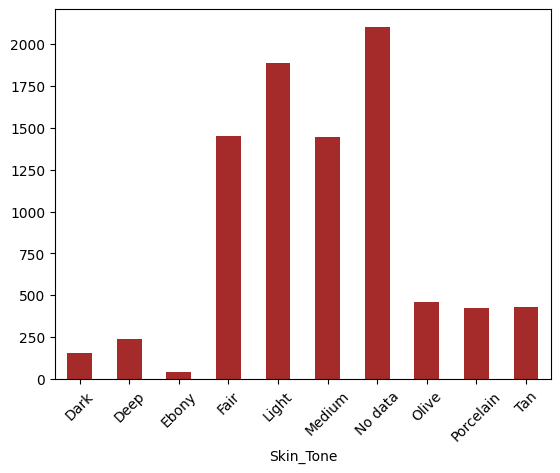

In [8]:
skintone_stats=df.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color='brown',rot=45)

In [9]:
skintype_stats=df.groupby('Skin_Type')['Username'].count()

<Axes: xlabel='Skin_Type'>

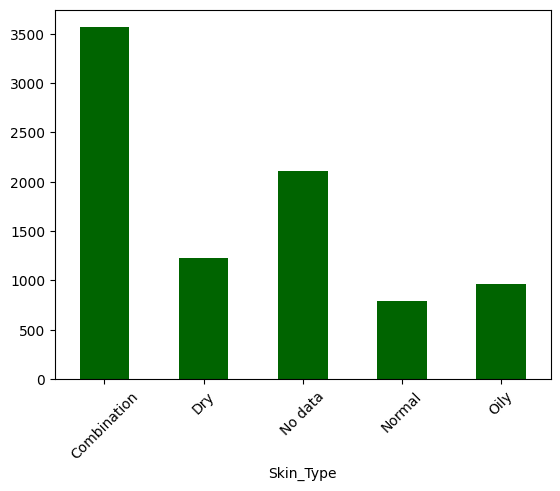

In [10]:
skintype_stats.plot.bar(color='darkgreen',rot=45)

In [11]:
eyecolor_stats=df.groupby('Eye_Color')['Username'].count()

<Axes: xlabel='Eye_Color'>

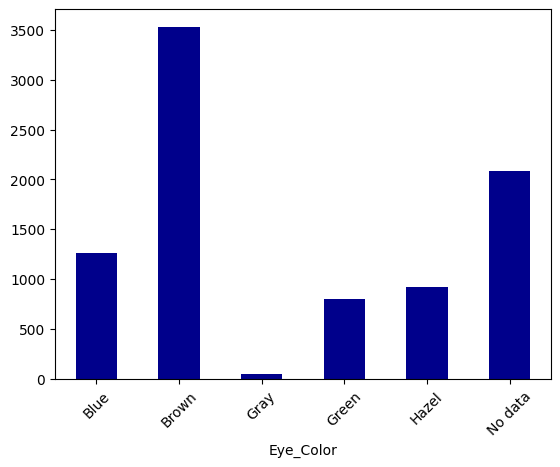

In [12]:
eyecolor_stats.plot.bar(color='darkblue',rot=45)

In [13]:
haircolor_stats=df.groupby('Hair_Color')['Username'].count()

<Axes: xlabel='Hair_Color'>

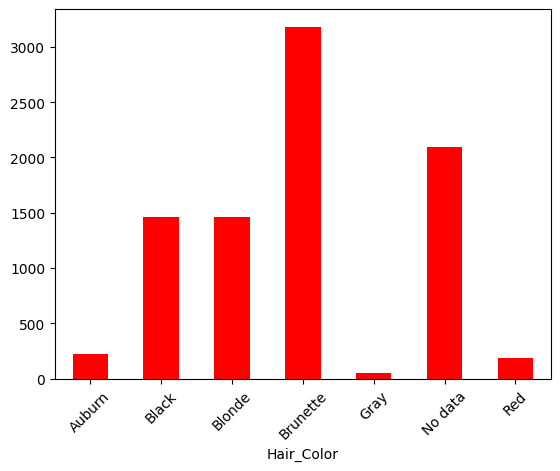

In [14]:
haircolor_stats.plot.bar(color='red',rot=45)

<Axes: xlabel='Rating_Stars'>

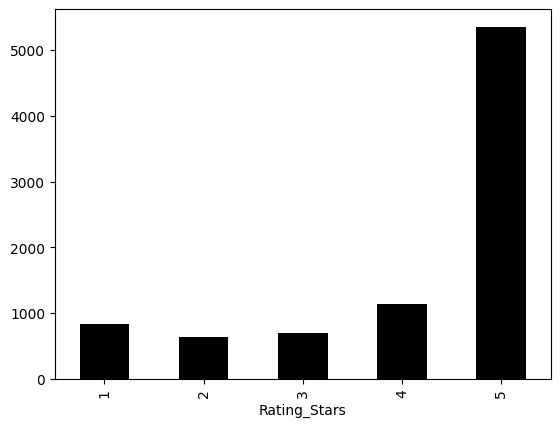

In [15]:
rating_stats = df.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

In [16]:
import markovify
import string

In [17]:
def no_punc(string):
    no_punc_string=re.sub('[^\w\s]','',string)
    return no_punc_string

In [18]:
df['Review']=df.apply(lambda row: no_punc(row['Review']),axis=1)

In [19]:
df['Review'].head()

0    This is hands down the best cleanser Ive ever ...
1    Unfortunately this doesnt work for everyone I ...
2    My favorite cleanser i love the packaging on t...
3    I love all things Youth To The People This cle...
4    I had a trial size of this and was obsessed My...
Name: Review, dtype: object

In [20]:
text_model=markovify.NewlineText(df.Review,state_size=2)

In [21]:
for i in range(10):
    print(text_model.make_sentence(),'\n\n')

I took the plunge and just the right amount of wetness to them when I first started to look a little drying I have cleaned my face looking clean and moisturized my skin sooo soft I dont wear makeup over the past and they stay clean 


Just smiling in a bottle It soothes and cleans well even with my redness and an employee suggested this After just 2 hours after applying it 


I like the smell is horrible Sometimes the pump because its gentler and works great on my counter because theyre perfectly compact and can massage this product line is by far my skin both in it and to me It doesnt leave a filmy residue on the skin tone Im in love It 


Love this sunscreen alone with no residue feeling on my face started breaking out since I read all the time I travel all over my body let alone my face as glowy and hydrated throughout my sometimes 9 12 hour work days and my face They are also starting to look awake It leaves my skin feeling smooth afterwards 


Dont waste your money and I have not 

In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [23]:
negativedf=df[df.Rating_Stars<=4]

In [24]:
negativedf.head()

Username  Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
1         PatTea     Medium  Combination     Brown        Red             1   
5        TABrown    No data      No data   No data    No data             2   
6       britcorm  Porcelain         Oily      Blue   Brunette             1   
18  keyz2thejeep       Dark  Combination     Brown     Blonde             4   
20       Vani241      Olive         Oily     Brown      Black             3   

                                               Review  \
1   Unfortunately this doesnt work for everyone I ...   
5   There is nothing great about this cleanser I g...   
6   Been trying this cleanser for about 3 weeks no...   
18  Best cleaner Ive ever used Gets my face nice a...   
20  There are Pros and Cons to this cleanser This ...   

                           Product                Brand  Price  ...  Oily  \
1   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
5   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
6   Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
18  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
20  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

   Sensitive  Category                                        Product_Url  \
1          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
5          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
6          0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
18         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
20         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

    User_id  Product_id                                Ingredients_Cleaned  \
1      2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
5      3008         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
6      3776         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
18     4996         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
20     3210         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                       Review_Cleaned Good_Stuff  \
1   ['unfortunately', 'work', 'everyone', 'used', ...          0   
5   ['nothing', 'great', 'cleanser', 'got', 'small...          0   
6   ['trying', 'cleanser', 'week', 'glad', 'bought...          0   
18  ['best', 'cleaner', 'ever', 'used', 'get', 'fa...          0   
20  ['pro', 'con', 'cleanser', 'cleaner', 'believe...          0   

                                            Ing_Tfidf  
1   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
5   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
6   sodium, cocoyl, glutamate, cocamidopropyl, bet...  
18  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
20  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

In [25]:
positvedf=df[df.Rating_Stars>4]

In [26]:
positvedf.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   
7     jenn887       Tan          Dry     Brown      Black             5   

                                              Review  \
0  This is hands down the best cleanser Ive ever ...   
2  My favorite cleanser i love the packaging on t...   
3  I love all things Youth To The People This cle...   
4  I had a trial size of this and was obsessed My...   
7  loveeeeeee this cleanser Leaves my skin smooth...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
7  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
7         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
7     4742         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...          1   
2  ['favorite', 'cleanser', 'love', 'packaging', ...          1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...          1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...          1   
7  ['loveeeeeee', 'cleanser', 'leaf', 'skin', 'sm...          1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
7  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

In [27]:
negative=" ".join(review for review in negativedf.Review)

In [28]:
negative

'Unfortunately this doesnt work for everyone I used it once and woke up the nxt day with 5 pimples used it again and again and again but woke up with more and more Finally i couldnt take it anymore I stopped using it went back to my cerave hydrating cleanser and Bam My skin was clearing up every day after that I suggest getting the small bottle to try it out first Remember everyones skin is very different\nread more There is nothing great about this cleanser I got the small size bottle to try out and would certainly never spend my money to buy this It did remove my makeup so this got 2 stars instead of one but it did nothing for my skin In fact I had some uneven texture after using this for a while There are much better cleansers out there Been trying this cleanser for about 3 weeks now and its not for me Im so glad I only bought the small bottle as this product broke me out Its the only new product in my routine so I know it is this one causing the break outs I also just didnt feel as

In [29]:
positive=" ".join(review for review in positvedf.Review)

In [30]:
positive

'This is hands down the best cleanser Ive ever used I originally got it in the mini bottle at checkout on a whim and was shocked by how much it cleared my skin up I bought the big bottle and havent looked back since now this is the only cleanser Ill use I used to get little pimples all over my forehead and ever since I started using this a year ago they went away and havent returned While I cant speak for everyones skin this was a miracle product for clearing my complexion and soothes my facial redness each time I use it Im in love\nread more My favorite cleanser i love the packaging on this even tho my first bottle slipped out of my hands lol I love all things Youth To The People This cleanser smells fresh and light the ingredients are fantastic and they are crueltyfree A quick google search of any brand will tell you if theyre actually crueltyfree dont just trust what a company says on its site there are very loose rules about a company being able to claim theyre CF on their marketin

In [31]:
stopwords=set(STOPWORDS)

In [32]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [33]:
stopwords.update(['read','more','product'])

In [34]:
len(set(STOPWORDS))

192

In [35]:
len(stopwords)

194

In [36]:
def generate_wordcloud(data):
    wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(data)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

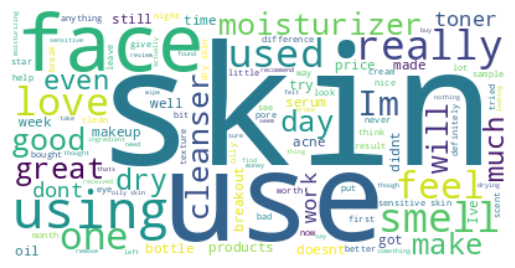

In [37]:
generate_wordcloud(negative)

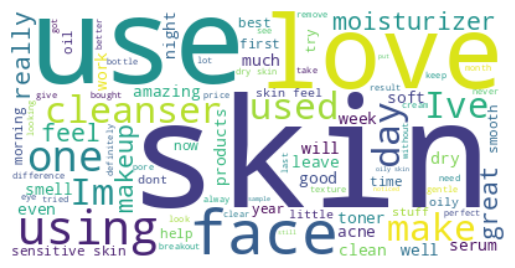

In [38]:
generate_wordcloud(positive)

In [39]:
df['Category'].value_counts()

Cleanser       4117
Moisturizer    2560
Treatment      1948
Face Mask        24
Name: Category, dtype: int64

In [40]:
moist_df=df[df.Category=='Moisturizer']

In [ ]:
cleanse_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
0      allyp3    Medium  Combination     Brown   Brunette             5   
1      PatTea    Medium  Combination     Brown        Red             1   
2    Sabi1991   No data      No data   No data    No data             5   
3  happyface2      Fair          Dry      Blue     Blonde             5   
4    kimkix34      Fair       Normal     Green     Blonde             5   

                                              Review  \
0  This is hands down the best cleanser Ive ever ...   
1  Unfortunately this doesnt work for everyone I ...   
2  My favorite cleanser i love the packaging on t...   
3  I love all things Youth To The People This cle...   
4  I had a trial size of this and was obsessed My...   

                          Product                Brand  Price  ...  Oily  \
0  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
1  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
2  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
3  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   
4  Superfood Antioxidant Cleanser  YOUTH TO THE PEOPLE     36  ...     0   

  Sensitive  Category                                        Product_Url  \
0         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
1         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
2         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
3         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   
4         0  Cleanser  https://www.sephora.com/product/kale-spinach-g...   

   User_id  Product_id                                Ingredients_Cleaned  \
0     3420         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
1     2483         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
2     2715         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
3     4497         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   
4     5017         157  ['sodium', 'cocoyl', 'glutamate', 'cocamidopro...   

                                      Review_Cleaned Good_Stuff  \
0  ['hand', 'best', 'cleanser', 'ever', 'used', '...          1   
1  ['unfortunately', 'work', 'everyone', 'used', ...          0   
2  ['favorite', 'cleanser', 'love', 'packaging', ...          1   
3  ['love', 'thing', 'youth', 'people', 'cleanser...          1   
4  ['trial', 'size', 'wa', 'obsessed', 'skin', 'f...          1   

                                           Ing_Tfidf  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...  

[5 rows x 25 columns]

In [41]:
cleanse_df=df[df.Category=='Cleanser']

In [42]:
mask_df=df[df.Category=='Face Mask']

In [43]:
mask_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  Rating_Stars  \
3072   summerstory    Medium  Combination     Brown      Black             1   
3073        Nuelle      Fair  Combination     Hazel   Brunette             4   
3074  MissQueenie1     Olive         Oily     Brown      Black             4   
3075     VivyKowal    Medium  Combination     Green     Blonde             5   
3076        NewAge       Tan  Combination     Brown   Brunette             3   

                                                 Review  \
3072  Its make my skin so dry I had to return it Its...   
3073  This cream doesnt feel heavy on the skin its r...   
3074  I have been using this product for a little bi...   
3075  I love this product I have combo skin and its ...   
3076  Feels nice on the skin and relaxing Love that ...   

                        Product    Brand  Price  ...  Oily Sensitive  \
3072  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3073  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3074  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3075  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   
3076  Time Freeze Sleeping Mask  LANEIGE     39  ...     1         1   

       Category                                        Product_Url  User_id  \
3072  Face Mask  https://www.sephora.com/product/time-freeze-sl...     6518   
3073  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2425   
3074  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2189   
3075  Face Mask  https://www.sephora.com/product/time-freeze-sl...     3234   
3076  Face Mask  https://www.sephora.com/product/time-freeze-sl...     2354   

      Product_id                                Ingredients_Cleaned  \
3072         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3073         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3074         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3075         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   
3076         274  ['propanediol', 'avena', 'sativa', 'oat', 'ker...   

                                         Review_Cleaned Good_Stuff  \
3072  ['make', 'skin', 'dry', 'return', 'freeze', 't...          0   
3073  ['cream', 'feel', 'heavy', 'skin', 'recommende...          0   
3074  ['using', 'little', 'bit', 'month', 'love', 'k...          0   
3075  ['love', 'combo', 'skin', 'perfectly', 'absorb...          1   
3076  ['feel', 'nice', 'skin', 'relaxing', 'love', '...          0   

                                              Ing_Tfidf  
3072  propanediol, avena, sativa, oat, kernel, extra...  
3073  propanediol, avena, sativa, oat, kernel, extra...  
3074  propanediol, avena, sativa, oat, kernel, extra...  
3075  propanediol, avena, sativa, oat, kernel, extra...  
3076  propanediol, avena, sativa, oat, kernel, extra...  

[5 rows x 25 columns]

In [45]:
treat_df=df[df.Category=='Treatment']

In [46]:
treat_df.head()

Username Skin_Tone    Skin_Type Eye_Color Hair_Color  \
6500         skimmet      Fair  Combination     Hazel   Brunette   
6501         JuleenP     Light  Combination     Green     Blonde   
6502  lovelylexilady   No data      No data   No data    No data   
6503      Skinis4Eva   No data      No data   No data    No data   
6504        Taranaga     Light       Normal     Hazel      Black   

      Rating_Stars                                             Review  \
6500             5  This product noticeably firmed and plumped my ...   
6501             4  I love this product so far I want to see how w...   
6502             2  Noticed zero change in my skin I was reluctant...   
6503             4  I actually saw plumper and more radiant skin a...   
6504             5  I received this as a sample and have been usin...   

                      Product  Brand  Price  ...  Oily Sensitive   Category  \
6500  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6501  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6502  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6503  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   
6504  Rapid Collagen Infusion  MURAD     84  ...     0         0  Treatment   

                                            Product_Url  User_id  Product_id  \
6500  https://www.sephora.com/product/rapid-collagen...     6376         214   
6501  https://www.sephora.com/product/rapid-collagen...     1448         214   
6502  https://www.sephora.com/product/rapid-collagen...     5308         214   
6503  https://www.sephora.com/product/rapid-collagen...     2883         214   
6504  https://www.sephora.com/product/rapid-collagen...     3049         214   

                                    Ingredients_Cleaned  \
6500  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6501  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6502  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6503  ['isodecyl', 'neopentanoate', 'polymethylsilse...   
6504  ['isodecyl', 'neopentanoate', 'polymethylsilse...   

                                         Review_Cleaned Good_Stuff  \
6500  ['noticeably', 'firmed', 'plumped', 'skin', 'w...          1   
6501  ['love', 'far', 'want', 'see', 'well', 'work',...          0   
6502  ['noticed', 'zero', 'change', 'skin', 'wa', 'r...          0   
6503  ['actually', 'saw', 'plumper', 'radiant', 'ski...          0   
6504  ['received', 'sample', 'using', 'week', 'notic...          1   

                                              Ing_Tfidf  
6500  isodecyl, neopentanoate, polymethylsilsesquiox...  
6501  isodecyl, neopentanoate, polymethylsilsesquiox...  
6502  isodecyl, neopentanoate, polymethylsilsesquiox...  
6503  isodecyl, neopentanoate, polymethylsilsesquiox...  
6504  isodecyl, neopentanoate, polymethylsilsesquiox...  

[5 rows x 25 columns]

In [47]:
moist=" ".join(ing for ing in moist_df.Ingredients)

In [48]:
moist

"Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origin. Water, Alcohol*, Citrus Aurantium Amara (Bitter Orange) Flower Water*, Parfum (Fragrance)*, Rosmarinus Officinalis (Rosemary) Leaf Oil*, Potassium Alum, Glycerin*, Mentha Piperita (Peppermint) Oil*, Styrax Tonkinensis Resin Extract*, Commiphora Myrrha Resin Extract*, Melissa Officinalis (Balm Mint) Leaf Oil*, Rosa Damascena Flower Oil*, Vitis Vinifera (Grape) Fruit Extract*, Tocopherol*, Citral*, Limonene*, Linalool*, Citronellol*, Geraniol*, Farnesol*, Benzyl Benzoate*, Eugenol*. *Plant origi

In [49]:
cleanse=" ".join(ing for ing in cleanse_df.Ingredients)

In [50]:
cleanse

"Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxyethanol, Potassium Sorbate, Sodium Benzoate, Chlorophyll. Water, Sodium Cocoyl Glutamate, Cocamidopropyl Betaine, Panthenol (Vitamin B5),Tocopheryl Acetate (Vitamin E), Ascorbic Acid (Vitamin C), Butylene Glycol, Brassica Oleracea(Kale) Leaf Extract, Spinacia Oleracea (Spinach) Leaf Extract, Camellia Sinensis (Green Tea)Leaf Extract, Chamomilla Recutita (Matricaria) Flower Extract, Medicago Sativa (Alfalfa) Extract,Aloe Barbadensis (Aloe Vera) Leaf Extract, Natural Fragrance, Lecithin, HydroxypropylMethylcellulose, Phenoxye

In [51]:
mask=" ".join(ing for ing in mask_df.Ingredients)

In [52]:
mask

'Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glyceryl Caprylate, Dextrin, Dimethicone / Vinyl Dimethicone Crosspolymer, Dipalmitoyl Hydroxyproline, Butylene Glycol, Cetearyl Glucoside, Cetearyl Alcohol, Ethylhexylglycerin, Xanthan Gum, Theobroma Cacao (Cocoa) Extract, Palmitic Acid, Polysorbate 20, PVP, PEG-240 / HDI Copolymer Bis-Decyltetradeceth-20 Ether, Hydroxyethyl Acrylate / Sodium Acryloyldimethyl Taurate Copolymer, Disodium EDTA, Phenoxyethanol, Fragrance. Water, Propanediol, Avena Sativa (Oat) Kernel Extract, Glycerin, Cyclopentasiloxane, Dimethicone, Squalane, Cyclohexasiloxane, Ceratonia Siliqua (Carob) Fruit Extract, Hibiscus Abelmoschus Seed Extract, Tillandsia Usneoides Extract, Adenosine, Hydrogenated Lecithin, C12-16 Alcohols, Glycery

In [53]:
treat=" ".join(ing for ing in treat_df.Ingredients)

In [54]:
treat

"Water, Isodecyl Neopentanoate, Polymethylsilsesquioxane, Glycerin, Pentylene Glycol, Neopentyl Glycol Diethylhexanoate, Cetyl Ethylhexanoate, Stearic Acid, Cetearyl Olivate, Dimethicone/Bis-Isobutyl PPG-20 Crosspolymer, Sorbitan Olivate, Butylene Glycol, Honey, Urea, Yeast Amino Acids, Trehalose, Inositol, Taurine, Betaine, Caprylic/Capric Triglyceride, Alaria Esculenta Extract, Palmitoyl Tripeptide-5, Codium Tomentosum Extract, Hydrogenated Olive Oil, Olive Fruit Oil, Olive Oil Unsaponifiables, Sodium Hyaluronate, Collagen Amino Acids, Watermelon Fruit Extract, Apple Fruit Extract, Lentil Fruit Extract, Tocopheryl Acetate, Sodium PCA, Sodium Lactate, Zinc Gluconate, Ascorbic Acid, Chitosan, Propyl Gallate, Polysorbate 20, Acrylates/C10-30 Alkyl Acrylate Crosspolymer, Aminomethyl Propanol, Trisodium Ethylenediamine Disuccinate, Disodium EDTA, Phenoxyethanol, Caprylyl Glycol, Chlorphenesin, Linalool, Anthemis Nobilis Flower Extract, Anthemis Nobilis Flower Oil, Lavender Oil. Water, Iso

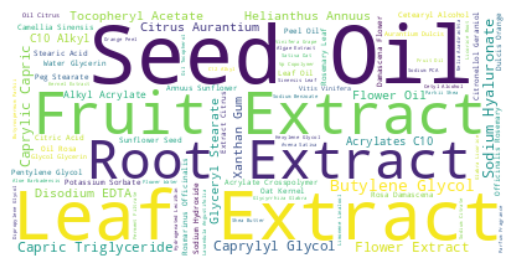

In [55]:
generate_wordcloud(moist)

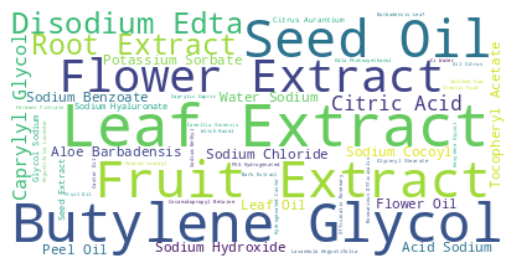

In [56]:
generate_wordcloud(cleanse)

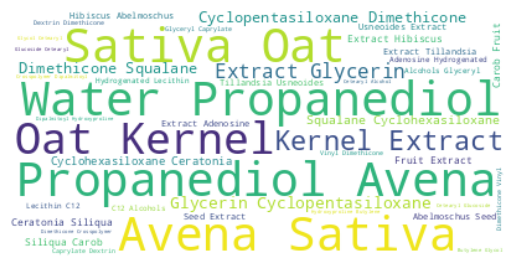

In [57]:
generate_wordcloud(mask)

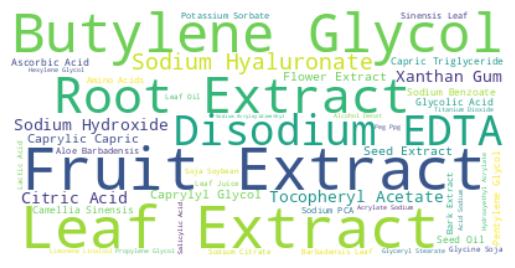

In [58]:
generate_wordcloud(treat)

In [59]:
x=df.Ingredients
y=df.Category

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=42)

In [61]:
categories=['Moisturizer','Cleanser','Face Mask','Treatment']

In [62]:
nb=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

In [63]:
nb.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [64]:
y_pred=nb.predict(xtest)

In [65]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9653259361997226


In [66]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.96      0.99      0.98      1031
    Cleanser       0.00      0.00      0.00         9
   Face Mask       0.99      0.96      0.98       649
   Treatment       0.94      0.92      0.93       474

    accuracy                           0.97      2163
   macro avg       0.72      0.72      0.72      2163
weighted avg       0.96      0.97      0.96      2163



In [67]:
logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1,C=1e5))])

In [68]:
logreg.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [69]:
y_pred=logreg.predict(xtest)

In [70]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9833564493758669


In [71]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.97      1.00      0.98       649
   Treatment       0.98      0.99      0.98       474

    accuracy                           0.98      2163
   macro avg       0.99      0.99      0.99      2163
weighted avg       0.98      0.98      0.98      2163



In [72]:
sgd=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])

In [73]:
sgd.fit(xtrain,ytrain)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [74]:
y_pred=sgd.predict(xtest)

In [75]:
print('accuracy %s' %accuracy_score(y_pred,ytest))

accuracy 0.9754969949144706


In [76]:
print(classification_report(ytest,y_pred,target_names=categories))

              precision    recall  f1-score   support

 Moisturizer       0.99      0.97      0.98      1031
    Cleanser       1.00      1.00      1.00         9
   Face Mask       0.96      1.00      0.98       649
   Treatment       0.97      0.96      0.96       474

    accuracy                           0.98      2163
   macro avg       0.98      0.98      0.98      2163
weighted avg       0.98      0.98      0.98      2163



In [77]:
x1=df.Ingredients

In [78]:
y1=df.Good_Stuff

In [79]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=25,random_state=42)

In [80]:
cat=['1','0']

In [81]:
nb=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',MultinomialNB())])

In [82]:
nb.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [83]:
y_pred=nb.predict(xtest1)

In [84]:
print('accuracy %s' %accuracy_score(y_pred,ytest1))

accuracy 0.64


In [85]:
print(classification_report(ytest1,y_pred,target_names=cat))

              precision    recall  f1-score   support

           1       0.50      0.22      0.31         9
           0       0.67      0.88      0.76        16

    accuracy                           0.64        25
   macro avg       0.58      0.55      0.53        25
weighted avg       0.61      0.64      0.60        25



In [86]:
logreg=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',LogisticRegression(n_jobs=1,C=1e5))])

In [87]:
logreg.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(C=100000.0, n_jobs=1))])

In [88]:
y_pred1=logreg.predict(xtest1)

In [89]:
print('accuracy %s' %accuracy_score(y_pred1,ytest1))

accuracy 0.68


In [90]:
print(classification_report(ytest1,y_pred1))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43         9
           1       0.70      0.88      0.78        16

    accuracy                           0.68        25
   macro avg       0.65      0.60      0.60        25
weighted avg       0.66      0.68      0.65        25



In [91]:
sgd=Pipeline([('vect',CountVectorizer()),('tfidf',TfidfTransformer()),('clf',SGDClassifier(loss='hinge',penalty='l2',alpha=1e-3,random_state=42,max_iter=5))])

In [92]:
sgd.fit(xtrain1,ytrain1)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42))])

In [93]:
y_pred1=sgd.predict(xtest1)

In [94]:
print('accuracy %s' %accuracy_score(y_pred1,ytest1))

accuracy 0.64


In [95]:
print(classification_report(ytest1,y_pred1,target_names=cat))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           0       0.64      1.00      0.78        16

    accuracy                           0.64        25
   macro avg       0.32      0.50      0.39        25
weighted avg       0.41      0.64      0.50        25



In [96]:
def recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor):
    ddf=df[(df['Skin_Tone']==skintone) & (df['Eye_Color']==eyecolor) &(df['Skin_Type']==skintype) & (df['Hair_Color']==haircolor)]
    recommendations=ddf[(ddf['Rating_Stars'].notnull())][['Rating_Stars','Product_Url','Product']]
    recommendations=recommendations.sort_values('Rating_Stars',ascending=False).head(10)
    print('Based on your features, these are the top products for you')
    return recommendations

In [97]:
skintone=str(input('Enter Skin Tone'))
eyecolor=str(input('Enter Eye Color'))
skintype=str(input('Enter Skin Type'))
haircolor=str(input('Enter Hair Color'))

Enter Skin Toneoily
Enter Eye Colorblack
Enter Skin Typeoily
Enter Hair Colornlack


In [98]:
recommend_products_by_user_features(skintone,eyecolor,skintype,haircolor)

Based on your features, these are the top products for you


Empty DataFrame
Columns: [Rating_Stars, Product_Url, Product]
Index: []

In [99]:
from sklearn.metrics.pairwise import linear_kernel,cosine_similarity

In [100]:
df_cont=df[['Product','Product_id','Ingredients','Product_Url','Ing_Tfidf','Rating']]

In [101]:
df_cont.head()

Product  Product_id  \
0  Superfood Antioxidant Cleanser         157   
1  Superfood Antioxidant Cleanser         157   
2  Superfood Antioxidant Cleanser         157   
3  Superfood Antioxidant Cleanser         157   
4  Superfood Antioxidant Cleanser         157   

                                         Ingredients  \
0  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
2  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
3  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
4  Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   

                                         Product_Url  \
0  https://www.sephora.com/product/kale-spinach-g...   
1  https://www.sephora.com/product/kale-spinach-g...   
2  https://www.sephora.com/product/kale-spinach-g...   
3  https://www.sephora.com/product/kale-spinach-g...   
4  https://www.sephora.com/product/kale-spinach-g...   

                                           Ing_Tfidf  Rating  
0  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
1  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
2  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
3  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
4  sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4

In [102]:
df_cont.drop_duplicates(inplace=True)

In [103]:
tf=TfidfVectorizer(analyzer='word',ngram_range=(1,2),min_df=0,stop_words='english')

In [104]:
tfidf_matrix=tf.fit_transform(df_cont['Ingredients'])

In [105]:
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [106]:
df_cont.head()

Product  Product_id  \
0           Superfood Antioxidant Cleanser         157   
48           Cleansing & Exfoliating Wipes          65   
96             Purity Made Simple Cleanser         210   
144            Beste™ No. 9 Jelly Cleanser          35   
192  The Rice Polish Foaming Enzyme Powder         196   

                                           Ingredients  \
0    Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
48   Water, Caprylic/Capric Triglyceride, Fragrance...   
96   Water, Sodium Lauroamphoacetate, Sodium Tridec...   
144  Water, Sodium Lauroyl Methyl Isethionate, Glyc...   
192  Microcrystalline Cellulose, Oryza Sativa (Rice...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
48   https://www.sephora.com/product/cleansing-exfo...   
96   https://www.sephora.com/product/purity-made-si...   
144  https://www.sephora.com/product/beste-no-9-jel...   
192  https://www.sephora.com/product/polished-rice-...   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
48   caprylic, capric, triglyceride, fragrance, phe...     4.5  
96   sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
144  sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
192  microcrystalline, cellulose, oryza, sativa, ri...     4.4

In [107]:
df_cont.reset_index(drop=True)

Product  Product_id  \
0                       Superfood Antioxidant Cleanser         157   
1                        Cleansing & Exfoliating Wipes          65   
2                          Purity Made Simple Cleanser         210   
3                          Beste™ No. 9 Jelly Cleanser          35   
4                The Rice Polish Foaming Enzyme Powder         196   
..                                                 ...         ...   
310      Midnight Secret Late Night Recovery Treatment         173   
311                      Post-Acne Spot Lightening Gel         198   
312    Hydro-Plumping Re-Texturizing Serum Concentrate         150   
313                 The Microdelivery Resurfacing Peel         266   
314  Ferulic + Retinol Wrinkle Recovery Overnight S...         124   

                                           Ingredients  \
0    Water, Sodium Cocoyl Glutamate, Cocamidopropyl...   
1    Water, Caprylic/Capric Triglyceride, Fragrance...   
2    Water, Sodium Lauroamphoacetate, Sodium Tridec...   
3    Water, Sodium Lauroyl Methyl Isethionate, Glyc...   
4    Microcrystalline Cellulose, Oryza Sativa (Rice...   
..                                                 ...   
310                        Visit the Guerlain boutique   
311  Water, Alcohol Denat., Glycolic Acid, Butylene...   
312  Water, Glycerin, Dimethicone, Propanediol, Dim...   
313  The Microdelivery Peel Step I:\r\r\nPeg-6, Sod...   
314  Water, DiCaprylyl Carbonate, Niacinamide, Cety...   

                                           Product_Url  \
0    https://www.sephora.com/product/kale-spinach-g...   
1    https://www.sephora.com/product/cleansing-exfo...   
2    https://www.sephora.com/product/purity-made-si...   
3    https://www.sephora.com/product/beste-no-9-jel...   
4    https://www.sephora.com/product/polished-rice-...   
..                                                 ...   
310  https://www.sephora.com/product/midnight-secre...   
311  https://www.sephora.com/product/post-acne-spot...   
312  https://www.sephora.com/product/hydro-plumping...   
313  https://www.sephora.com/product/the-microdeliv...   
314  https://www.sephora.com/product/ferulic-retino...   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
1    caprylic, capric, triglyceride, fragrance, phe...     4.5  
2    sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
3    sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
4    microcrystalline, cellulose, oryza, sativa, ri...     4.4  
..                                                 ...     ...  
310                          visit, guerlain, boutique     4.2  
311  alcohol, denat, glycolic, acid, butylene, glyc...     3.7  
312  glycerin, dimethicone, propanediol, dimethicon...     4.7  
313  microdelivery, peel, step, peg, sodium, bicarb...     4.7  
314  dicaprylyl, carbonate, niacinamide, cetyl, alc...     4.4  

[315 rows x 6 columns]

In [108]:
titles=df_cont[['Product','Ing_Tfidf','Rating']]

In [109]:
titles.head()

Product  \
0           Superfood Antioxidant Cleanser   
48           Cleansing & Exfoliating Wipes   
96             Purity Made Simple Cleanser   
144            Beste™ No. 9 Jelly Cleanser   
192  The Rice Polish Foaming Enzyme Powder   

                                             Ing_Tfidf  Rating  
0    sodium, cocoyl, glutamate, cocamidopropyl, bet...     4.4  
48   caprylic, capric, triglyceride, fragrance, phe...     4.5  
96   sodium, lauroamphoacetate, sodium, trideceth, ...     4.5  
144  sodium, lauroyl, methyl, isethionate, glycerin...     4.1  
192  microcrystalline, cellulose, oryza, sativa, ri...     4.4

In [110]:
indices=pd.Series(df_cont.index,index=df_cont['Product'])

In [111]:
indices

Product
Superfood Antioxidant Cleanser                           0
Cleansing & Exfoliating Wipes                           48
Purity Made Simple Cleanser                             96
Beste™ No. 9 Jelly Cleanser                            144
The Rice Polish Foaming Enzyme Powder                  192
                                                      ... 
Midnight Secret Late Night Recovery Treatment         8583
Post-Acne Spot Lightening Gel                         8607
Hydro-Plumping Re-Texturizing Serum Concentrate       8631
The Microdelivery Resurfacing Peel                    8655
Ferulic + Retinol Wrinkle Recovery Overnight Serum    8679
Length: 315, dtype: int64

In [112]:
indices['Superfood Antioxidant Cleanser']

0

In [113]:
def content_recommendation(product):
    idx=indices[product]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    product_indices=[i[0] for i in sim_scores]
    return titles.iloc[product_indices]


In [114]:
content_recommendation('The Rice Polish Foaming Enzyme Powder')

Product  \
8012             Water Drench Hyaluronic Cloud Serum   
1440             Water Drench Hyaluronic Cloud Cream   
2040                      Nutrient-Charged Water Gel   
5616                          Problem Solution Toner   
1080                The True Cream Moisturizing Bomb   
6764  Skin Rescue Acne Clearing Pads with White Clay   
4536                       Deep Cleansing Exfoliator   
3432                                 Treatment Toner   
1728                   Superberry Hydrate + Glow Oil   
1512         Goodnight Glow Retin-ALT Sleeping Crème   

                                              Ing_Tfidf  Rating  
8012  saccharide, isomerate, sodium, hyaluronate, so...     4.2  
1440  glycerin, cyclopentasiloxane, dipropylene, gly...     4.4  
2040  dimethicone, glycerin, propanediol, saccharide...     4.6  
5616  dipropylene, glycol, butylene, glycol, hexaned...     4.3  
1080  glycerin, cyclohexasiloxane, hydrogenated, pol...     4.6  
6764  polysorbate, phenoxyethanol, sodium, hydroxide...     4.2  
4536  polylactic, acid, hexyldecyl, stearate, glycer...     4.6  
3432  panax, ginseng, root, extract, butylene, glyco...     4.4  
1728  helianthus, annuus, sunflower, seed, oil, dica...     4.8  
1512  glycerin, vitis, vinifera, grape, seed, oil, c...     4.3

## Project Completed

## Congratulations